# WeatherPy
----

#### Analysis
After collecting weather data from _# of random cities around the world using an API_key & OpenWeatherMap API, it can be stated that max temperatures are reached when nearing the equator in both the northern and southern hemispheres. 
Everytime the dataset is run, different cities are analyzed, but I think a generalization that can be made is there is a low amount of correlation between humidity and latitude, and that the cloudiness (%) data seemed be to evenly distributed around the cities regardless of the latitude.


In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime 
from scipy import stats 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial" 
# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="
requests.get(query_url + city).json()

{'coord': {'lon': -152.4072, 'lat': 57.79},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 42.31,
  'feels_like': 37.38,
  'temp_min': 39.27,
  'temp_max': 42.31,
  'pressure': 993,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 50},
 'clouds': {'all': 90},
 'dt': 1634854528,
 'sys': {'type': 1,
  'id': 7668,
  'country': 'US',
  'sunrise': 1634835521,
  'sunset': 1634870961},
 'timezone': -28800,
 'id': 5866583,
 'name': 'Saint Paul Harbor',
 'cod': 200}

In [39]:
city_name = []
country_name = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
processing_record = 1
set_count = 1
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        processing_record = 0
    #endpoint url
    city_url = url + "&q=" + city
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_record = response["name"]
        country_name.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
    
        
        print(f"Processing Record {processing_record} of Set {set_count} | {city_record}")

        processing_record += 1
    except:
        print("City not found. Skipping...") 
    continue
# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Edson
Processing Record 2 of Set 1 | Guangzhou
Processing Record 3 of Set 1 | Nikolskoye
Processing Record 4 of Set 1 | Havre-St-Pierre
Processing Record 5 of Set 1 | Kuril'sk
City not found. Skipping...
Processing Record 6 of Set 1 | Atuona
City not found. Skipping...
Processing Record 7 of Set 1 | Hermanus
Processing Record 8 of Set 1 | Punta Arenas
Processing Record 9 of Set 1 | Souillac
Processing Record 10 of Set 1 | Taoudenni
Processing Record 11 of Set 1 | Hasaki
Processing Record 12 of Set 1 | Chokurdakh
City not found. Skipping...
Processing Record 13 of Set 1 | Aklavik
City not found. Skipping...
Processing Record 14 of Set 1 | Ponta do Sol
Processing Record 15 of Set 1 | Beira
Processing Record 16 of Set 1 | New Norfolk
Processing Record 17 of Set 1 | Port Alfred
Processing Record 18 of Set 1 | Jamestown
Processing Record 19 of Set 1 | Tiksi
Processing Record 20 of Set 1 | Tuatapere
Proce

Processing Record 2 of Set 5 | Arrondissement d'Ajaccio
Processing Record 3 of Set 5 | Nārāyanganj
City not found. Skipping...
Processing Record 4 of Set 5 | Martapura
Processing Record 5 of Set 5 | Caruray
Processing Record 6 of Set 5 | Shimoda
Processing Record 7 of Set 5 | Zhanakorgan
Processing Record 8 of Set 5 | Vaini
Processing Record 9 of Set 5 | Havelock
Processing Record 10 of Set 5 | Puerto Escondido
Processing Record 11 of Set 5 | Charters Towers
Processing Record 12 of Set 5 | Poum
Processing Record 13 of Set 5 | Krasnosel'kup
Processing Record 14 of Set 5 | Meulaboh
Processing Record 15 of Set 5 | Oranjestad
Processing Record 16 of Set 5 | Geraldton
Processing Record 17 of Set 5 | Legnica
Processing Record 18 of Set 5 | Pemba
Processing Record 19 of Set 5 | Solnechnyy
Processing Record 20 of Set 5 | Lodja
City not found. Skipping...
Processing Record 21 of Set 5 | Luba
Processing Record 22 of Set 5 | Mahébourg
Processing Record 23 of Set 5 | Nyurba
Processing Record 24 of

Processing Record 5 of Set 9 | Saint George
Processing Record 6 of Set 9 | Valguarnera Caropepe
Processing Record 7 of Set 9 | Medicine Hat
Processing Record 8 of Set 9 | Zhigansk
Processing Record 9 of Set 9 | Chumikan
Processing Record 10 of Set 9 | Kilkis
Processing Record 11 of Set 9 | Inongo
Processing Record 12 of Set 9 | San Juan
Processing Record 13 of Set 9 | Umluj
Processing Record 14 of Set 9 | Kutum
Processing Record 15 of Set 9 | Américo Brasiliense
Processing Record 16 of Set 9 | Yulara
Processing Record 17 of Set 9 | Granada
Processing Record 18 of Set 9 | Sambava
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 9 | Elizabeth City
Processing Record 20 of Set 9 | Hofn
City not found. Skipping...
Processing Record 21 of Set 9 | Celestún
Processing Record 22 of Set 9 | Salé
Processing Record 23 of Set 9 | Acapulco de Juárez
Processing Record 24 of Set 9 | Polovinnoye
Processing Record 25 of Set 9 | Kastraki
Processing Record 26 of Set 9 | 

Processing Record 7 of Set 13 | Pemangkat
Processing Record 8 of Set 13 | Kawalu
Processing Record 9 of Set 13 | Emerald
Processing Record 10 of Set 13 | Mayya
Processing Record 11 of Set 13 | Abu Dhabi
Processing Record 12 of Set 13 | Bubaque
Processing Record 13 of Set 13 | Poya
Processing Record 14 of Set 13 | São João da Barra
City not found. Skipping...
Processing Record 15 of Set 13 | Camopi
Processing Record 16 of Set 13 | Elliot
Processing Record 17 of Set 13 | Luganville
Processing Record 18 of Set 13 | Kupang
Processing Record 19 of Set 13 | Chandigarh
City not found. Skipping...
Processing Record 20 of Set 13 | ‘Ewa Beach
Processing Record 21 of Set 13 | Ulladulla
City not found. Skipping...
Processing Record 22 of Set 13 | Semey
Processing Record 23 of Set 13 | Kilindoni
City not found. Skipping...
Processing Record 24 of Set 13 | Bay City
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
#df for city, lat, lng, max temp, humidity, cloudiness, wind speed, country, and date
#go back and add all of those to your loop and make empty lists for them 
#create dictionary 
df_1= pd.DataFrame({
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country_name,
    "Date": date
})
#drop skipped rows 
df_1 = df_1.dropna(how="any")

df_1

#hopefully will work when API key works again 

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edson,53.5835,-116.4356,59.14,36,1,8.05,CA,1634854598
1,Guangzhou,23.1167,113.2500,60.94,71,95,12.75,CN,1634854289
2,Nikolskoye,59.7035,30.7861,53.87,85,100,16.40,RU,1634854598
3,Havre-St-Pierre,50.2334,-63.5986,50.00,87,1,4.61,CA,1634854598
4,Kuril'sk,45.2333,147.8833,41.11,84,100,4.29,RU,1634854599
...,...,...,...,...,...,...,...,...,...
570,‘Ewa Beach,21.3156,-158.0072,84.15,62,75,10.00,US,1634854787
571,Ulladulla,-35.3500,150.4667,66.09,84,32,2.15,AU,1634854788
572,Semey,50.4111,80.2275,43.86,83,100,16.55,KZ,1634854789
573,Kilindoni,-7.9139,39.6668,77.50,77,19,12.08,TZ,1634854789


In [41]:
df_1.to_csv("./output_data/cities.csv", index=False)

In [42]:
df_1.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edson,53.5835,-116.4356,59.14,36,1,8.05,CA,1634854598
1,Guangzhou,23.1167,113.2500,60.94,71,95,12.75,CN,1634854289
2,Nikolskoye,59.7035,30.7861,53.87,85,100,16.40,RU,1634854598
3,Havre-St-Pierre,50.2334,-63.5986,50.00,87,1,4.61,CA,1634854598
4,Kuril'sk,45.2333,147.8833,41.11,84,100,4.29,RU,1634854599


In [43]:
#create statistic summary table for data 
lat_stat= df_1["Latitude"].describe()
long_stat= df_1["Longitude"].describe()
max_stat=df_1["Max Temperature"].describe()
humid_stat= df_1["Humidity"].describe()
cloud_stat= df_1["Cloudiness"].describe()
wind_stat= df_1["Wind Speed"].describe()
date_stat= df_1["Date"].describe()

In [44]:
df_2= pd.DataFrame({
    "Lat":lat_stat,
    "Lng": long_stat,
    "Max Temp": max_stat,
    "Humidity": humid_stat,
    "Cloudiness": cloud_stat,
    "Wind Speed": wind_stat,
    "Date": date_stat
})
df_2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.937844,22.657516,60.017130,72.953043,57.906087,7.873304,1.634855e+09
std,33.325943,88.649759,20.886533,18.947099,38.721622,5.736367,8.436573e+01
min,-54.800000,-175.200000,-17.520000,14.000000,0.000000,0.000000,1.634854e+09
25%,-7.574200,-53.740200,47.590000,63.000000,20.000000,3.645000,1.634855e+09
50%,23.623300,25.570100,64.740000,77.000000,72.000000,6.600000,1.634855e+09
75%,49.997450,102.382750,77.140000,87.000000,98.000000,10.360000,1.634855e+09
max,78.218600,179.316700,97.320000,100.000000,100.000000,39.010000,1.634855e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
df_2

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.937844,22.657516,60.017130,72.953043,57.906087,7.873304,1.634855e+09
std,33.325943,88.649759,20.886533,18.947099,38.721622,5.736367,8.436573e+01
min,-54.800000,-175.200000,-17.520000,14.000000,0.000000,0.000000,1.634854e+09
25%,-7.574200,-53.740200,47.590000,63.000000,20.000000,3.645000,1.634855e+09
50%,23.623300,25.570100,64.740000,77.000000,72.000000,6.600000,1.634855e+09
75%,49.997450,102.382750,77.140000,87.000000,98.000000,10.360000,1.634855e+09
max,78.218600,179.316700,97.320000,100.000000,100.000000,39.010000,1.634855e+09


In [46]:
#  Get the indices of cities that have humidity over 100%.
humidity = df_1[(df_1["Humidity"] > 100)].index
print("There are no cities in this dataframe that have a humidity level of over 100%")

There are no cities in this dataframe that have a humidity level of over 100%


In [47]:
len(df_1)

575

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

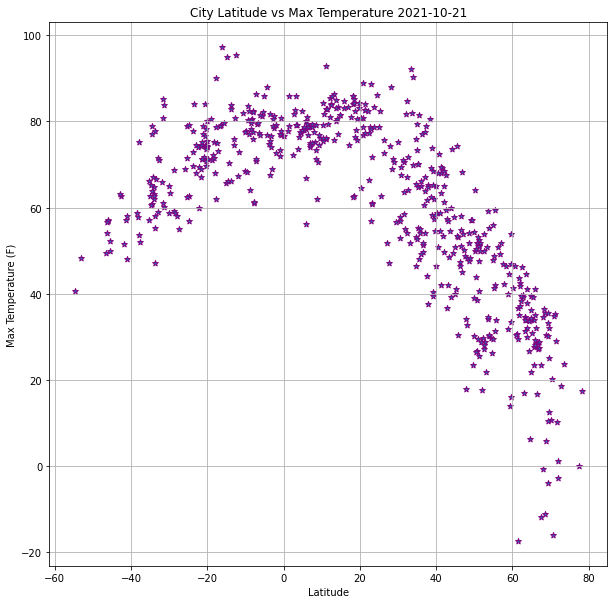

In [48]:
date = datetime.date(datetime.now())
#x and y values 
x_values1 = df_1["Latitude"]
y_values1 = df_1["Max Temperature"]
#plotting
fig1, ax1 = plt.subplots(figsize=(10,10))

#adding titles etc
plt.title(f"City Latitude vs Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(x_values1, y_values1, edgecolor="purple", linewidth=1, marker="*", alpha=1)
plt.savefig("Images/City Latitude vs. Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

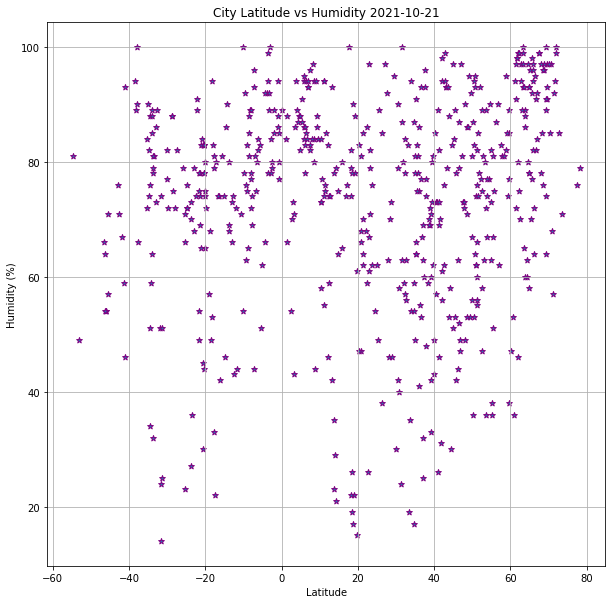

In [49]:
#repeat but change values
x_values2 = df_1["Latitude"]
y_values2 = df_1["Humidity"]
#plot
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values2, y_values2, edgecolor="purple", linewidth=1, marker="*", alpha=1)

#add title etc
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date}")
plt.grid()
plt.savefig("Images/City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

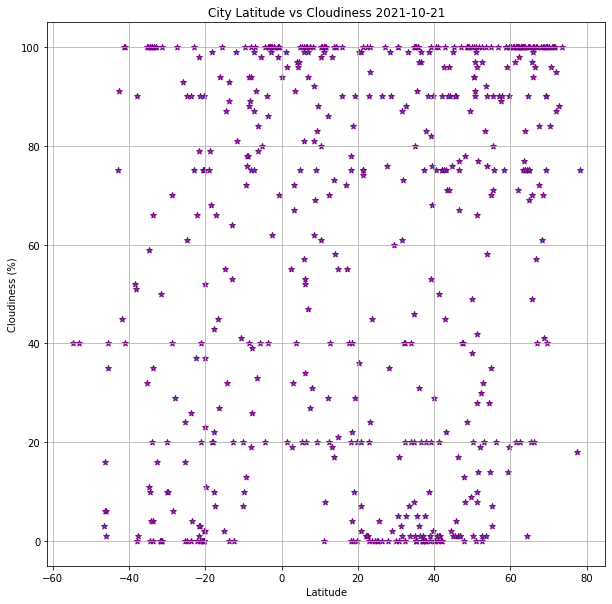

In [50]:
#repeat change variables 
x_values3 = df_1["Latitude"]
y_values3 = df_1["Cloudiness"]
#plot 
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.scatter(x_values3, y_values3, edgecolor="purple", linewidth=1, marker="*", alpha=1)


#add title etc
plt.title(f"City Latitude vs Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/City Latitude vs. Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

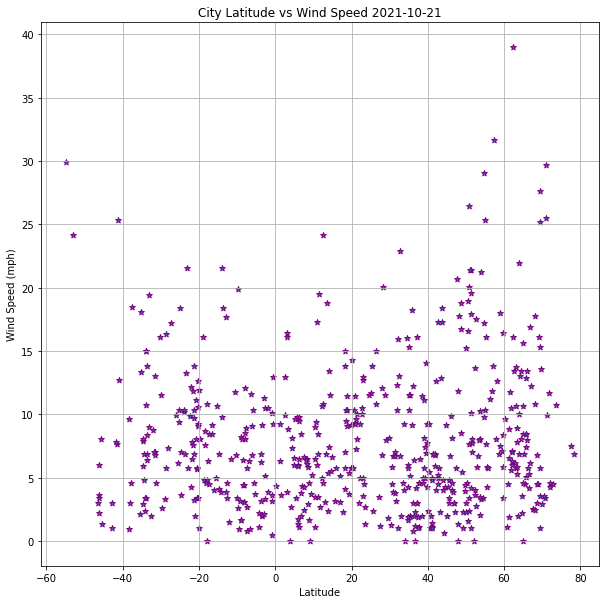

In [51]:
x_values4 = df_1["Latitude"]
y_values4 = df_1["Wind Speed"]
#Plot
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.scatter(x_values4, y_values4, edgecolor="purple", linewidth=1, marker="*", alpha=1)
#Add title etc
plt.title(f"City Latitude vs Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [52]:
#dataframe for northen hemisphere and southern hemisphere
north_df=df_1.loc[df_1['Latitude']>=0,['Latitude','Max Temperature','Humidity','Cloudiness','Wind Speed']].copy()
south_df=df_1.loc[df_1['Latitude']<0,['Latitude','Max Temperature','Humidity','Cloudiness','Wind Speed']].copy()

def regression (x_values, y_values,y_label,plt_title, x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2:.4f}")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(plt_title)
    plt.show()

In [53]:
# > 0 is Northern hemisphere, and < 0 is Southern.
northern = df_1.loc[(df_1["Latitude"] >= 0)]
southern = df_1.loc[(df_1["Latitude"] < 0)]

In [54]:
# > 0 is Northern hemisphere, and < 0 is Southern.
northern = df_1.loc[(df_1["Latitude"] >= 0)]
southern = df_1.loc[(df_1["Latitude"] < 0)]

In [55]:
northern

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Edson,53.5835,-116.4356,59.14,36,1,8.05,CA,1634854598
1,Guangzhou,23.1167,113.2500,60.94,71,95,12.75,CN,1634854289
2,Nikolskoye,59.7035,30.7861,53.87,85,100,16.40,RU,1634854598
3,Havre-St-Pierre,50.2334,-63.5986,50.00,87,1,4.61,CA,1634854598
4,Kuril'sk,45.2333,147.8833,41.11,84,100,4.29,RU,1634854599
...,...,...,...,...,...,...,...,...,...
565,Camopi,3.1655,-52.3158,79.23,71,72,3.89,GF,1634854785
569,Chandigarh,30.7343,76.7933,67.46,40,0,3.87,IN,1634854787
570,‘Ewa Beach,21.3156,-158.0072,84.15,62,75,10.00,US,1634854787
572,Semey,50.4111,80.2275,43.86,83,100,16.55,KZ,1634854789


In [56]:
southern

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
5,Atuona,-9.8000,-139.0333,77.88,78,10,19.91,PF,1634854599
6,Hermanus,-34.4187,19.2345,60.80,76,100,4.83,ZA,1634854600
7,Punta Arenas,-53.1500,-70.9167,48.31,49,40,24.16,CL,1634854317
8,Souillac,-20.5167,57.5167,74.35,83,75,3.44,MU,1634854600
14,Beira,-19.8436,34.8389,71.28,72,11,8.05,MZ,1634854602
...,...,...,...,...,...,...,...,...,...
566,Elliot,-31.3333,27.8500,60.13,51,100,4.61,ZA,1634854786
567,Luganville,-15.5333,167.1667,79.59,81,100,4.97,VU,1634854786
568,Kupang,-10.1667,123.5833,77.58,100,20,3.44,ID,1634854786
571,Ulladulla,-35.3500,150.4667,66.09,84,32,2.15,AU,1634854788


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7272


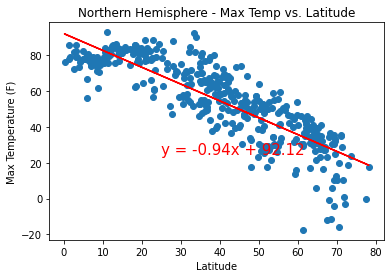

<Figure size 432x288 with 0 Axes>

In [57]:
# calling weather_regression function to plot and add linear regression
regression(north_df['Latitude'],north_df['Max Temperature'],'Max Temperature (F)',
                   "Northern Hemisphere - Max Temp vs. Latitude",25,25)
plt.savefig("Images/City NLatitude vs. Max Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4636


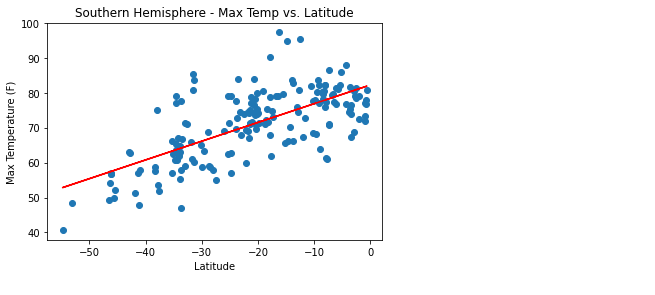

<Figure size 432x288 with 0 Axes>

In [58]:
regression(south_df['Latitude'],south_df['Max Temperature'],'Max Temperature (F)',
                   "Southern Hemisphere - Max Temp vs. Latitude",25,25)
plt.savefig("Images/City SLatitude vs. Max Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0243


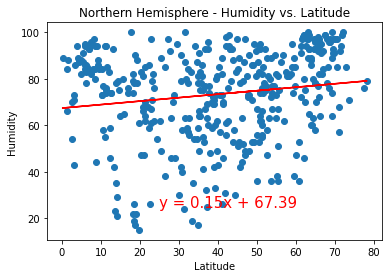

<Figure size 432x288 with 0 Axes>

In [59]:
regression(north_df['Latitude'],north_df['Humidity'],'Humidity',
                   "Northern Hemisphere - Humidity vs. Latitude",25,25)
plt.savefig("Images/City NLatitude vs. Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0576


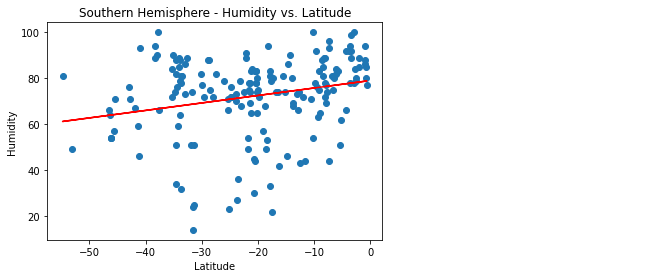

<Figure size 432x288 with 0 Axes>

In [60]:
regression(south_df['Latitude'],south_df['Humidity'],'Humidity',
                   "Southern Hemisphere - Humidity vs. Latitude",25,25)
plt.savefig("Images/City SLatitude vs. Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0257


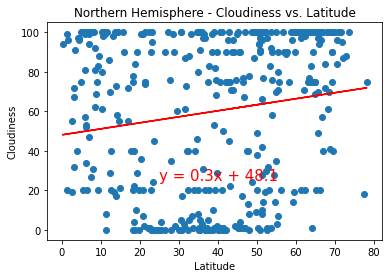

<Figure size 432x288 with 0 Axes>

In [61]:
regression(north_df['Latitude'],north_df['Cloudiness'],'Cloudiness',
                   "Northern Hemisphere - Cloudiness vs. Latitude",25,25)
plt.savefig("Images/City NLatitude vs. Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1022


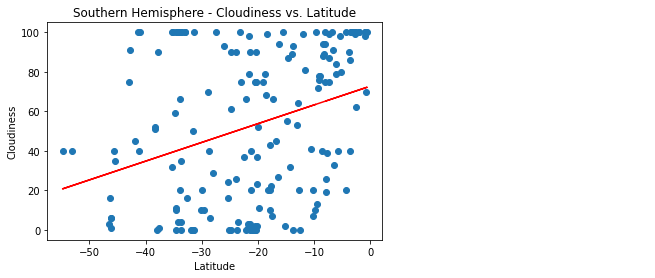

<Figure size 432x288 with 0 Axes>

In [62]:
regression(south_df['Latitude'],south_df['Cloudiness'],'Cloudiness',
                   "Southern Hemisphere - Cloudiness vs. Latitude",25,25)
plt.savefig("Images/City SLatitude vs. Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0230


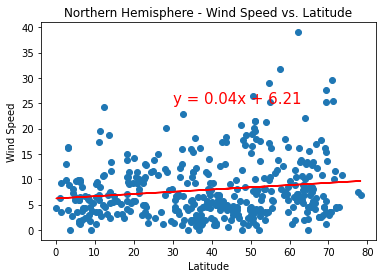

<Figure size 432x288 with 0 Axes>

In [63]:
regression(north_df['Latitude'],north_df['Wind Speed'],'Wind Speed',
                   "Northern Hemisphere - Wind Speed vs. Latitude",30,25)
plt.savefig("Images/City NLatitude vs. Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0489


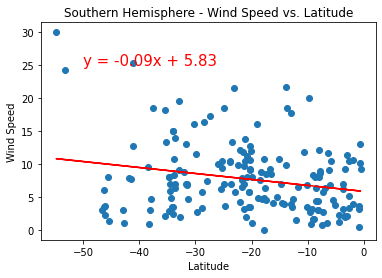

<Figure size 432x288 with 0 Axes>

In [64]:
regression(south_df['Latitude'],south_df['Wind Speed'],'Wind Speed',
                   "Southern Hemisphere - Wind Speed vs. Latitude",-50,25)
plt.savefig("Images/City SLatitude vs. Wind Speed.png")